Pontos esperados:

1. Apresente as características do conjunto de dados fornecido, destacando sua visão geral acerca do conjunto de dados e tecendo críticas e comentários.
2. Faça uma análise detalhada das variáveis numéricas e categóricas da base de dados, discutindo sua distribuição e outras características relevantes.
3. Limpeza de dados: Considere a avaliação da existência de valores ausentes e de possíveis outliers, discutindo como estes podem ser tratados ou eliminados.
4. Feature engineering: Quais variáveis você poderia criar para enriquecer a análise?
5. Enriquecimento da base: Inclua qualquer outra informação/análise que achar importante.
6. Que outras bases externas ou internas voce buscaria para enriquecer as análises?

In [1]:
!pip install inflection

In [2]:
import inflection
import math 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

%matplotlib inline

sales = pd.read_csv('train.csv')
print(sales.shape)
#teste = pd.read_csv('test.csv')
#print(teste.shape)
stores=pd.read_csv("store.csv")
print(stores.shape)
sales=sales.merge(stores, how="inner", on="Store")
print(sales.shape)

C:\Users\joao\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(1017209, 9)
(1115, 10)
(1017209, 18)


In [3]:
oldCols=list(sales.columns)
snakecase=lambda x: inflection.underscore(x)
newCols=list(map(snakecase, oldCols))
#print(newCols)

sales.columns = newCols
sales.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   store                         1017209 non-null  int64  
 1   day_of_week                   1017209 non-null  int64  
 2   date                          1017209 non-null  object 
 3   sales                         1017209 non-null  int64  
 4   customers                     1017209 non-null  int64  
 5   open                          1017209 non-null  int64  
 6   promo                         1017209 non-null  int64  
 7   state_holiday                 1017209 non-null  object 
 8   school_holiday                1017209 non-null  int64  
 9   store_type                    1017209 non-null  object 
 10  assortment                    1017209 non-null  object 
 11  competition_distance          1014567 non-null  float64
 12  competition_open_since_month

In [5]:
sales.describe()

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [6]:
sales["date"]=pd.to_datetime(sales["date"]).dt.date
sales.info()

#stamp.strftime('%Y-%m-%d')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   store                         1017209 non-null  int64  
 1   day_of_week                   1017209 non-null  int64  
 2   date                          1017209 non-null  object 
 3   sales                         1017209 non-null  int64  
 4   customers                     1017209 non-null  int64  
 5   open                          1017209 non-null  int64  
 6   promo                         1017209 non-null  int64  
 7   state_holiday                 1017209 non-null  object 
 8   school_holiday                1017209 non-null  int64  
 9   store_type                    1017209 non-null  object 
 10  assortment                    1017209 non-null  object 
 11  competition_distance          1014567 non-null  float64
 12  competition_open_since_month

In [7]:
#a = public holiday, b = Easter holiday, c = Christmas, 0 = None
sales["state_holiday"].replace({"a": "public_holiday", "b": "easter_holiday", "c": "christmas", "0": "None", 0: "None"}, inplace=True)
print(sales.state_holiday.unique())
sales.head(20)

['None' 'public_holiday' 'easter_holiday' 'christmas']


,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
0,1,5,2015-07-31,5263,555,1,1,None,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,None,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,None,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,None,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,None,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
5,1,7,2015-07-26,0,0,0,0,None,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
6,1,6,2015-07-25,4364,500,1,0,None,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
7,1,5,2015-07-24,3706,459,1,0,None,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
8,1,4,2015-07-23,3769,503,1,0,None,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
9,1,3,2015-07-22,3464,463,1,0,None,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [8]:
sales.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

In [9]:
sales["competition_distance"].fillna(sales["competition_distance"].max(), inplace = True)
sales.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance                 0
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

In [10]:
#Colunas excluídas 
print(sales.shape)
sales.drop(["assortment", "competition_open_since_month"], axis=1, inplace=True)
print(sales.shape)

(1017209, 18)
(1017209, 16)


In [11]:
sales.groupby("store")["date"].transform(lambda x: x.min().year)

0          2013
1          2013
2          2013
3          2013
4          2013
           ... 
1017204    2013
1017205    2013
1017206    2013
1017207    2013
1017208    2013
Name: date, Length: 1017209, dtype: int64

In [12]:
mask=sales["competition_open_since_year"].isna()
#sales.loc[mask, 'competition_open_since_year'] = sales.loc[mask, "date"].apply(lambda x: x.year)
sales.loc[mask, 'competition_open_since_year'] = 2013
sales.head(5)

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,competition_distance,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
0,1,5,2015-07-31,5263,555,1,1,None,1,c,1270.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,None,1,c,1270.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,None,1,c,1270.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,None,1,c,1270.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,None,1,c,1270.0,2008.0,0,NaN,NaN,NaN


In [13]:
sales['promo2_since_year'].replace(np.nan, 0, inplace=True)
sales['promo2_since_year'] = sales['promo2_since_year'].astype(np.int32)
sales.isna().sum()

store                               0
day_of_week                         0
date                                0
sales                               0
customers                           0
open                                0
promo                               0
state_holiday                       0
school_holiday                      0
store_type                          0
competition_distance                0
competition_open_since_year         0
promo2                              0
promo2_since_week              508031
promo2_since_year                   0
promo_interval                 508031
dtype: int64

In [14]:
print(sales["promo_interval"].unique())
sales["promo_interval"].replace(np.nan, "None", inplace=True)
sales.isna().sum()

[nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


store                               0
day_of_week                         0
date                                0
sales                               0
customers                           0
open                                0
promo                               0
state_holiday                       0
school_holiday                      0
store_type                          0
competition_distance                0
competition_open_since_year         0
promo2                              0
promo2_since_week              508031
promo2_since_year                   0
promo_interval                      0
dtype: int64

In [15]:
sales.drop(["promo2_since_week"], axis=1, inplace=True)
sales.isna().sum()

store                          0
day_of_week                    0
date                           0
sales                          0
customers                      0
open                           0
promo                          0
state_holiday                  0
school_holiday                 0
store_type                     0
competition_distance           0
competition_open_since_year    0
promo2                         0
promo2_since_year              0
promo_interval                 0
dtype: int64

In [16]:
# Qual loja fez mais vendas?
#sales.groupby("store")["sales"].sum().sort_values(ascending=False)
sales.groupby("store")[["sales"]].sum().sort_values("sales", ascending=False).head(1)


,sales
store,
262,19516842


In [17]:
# Qual loja tem a maior média de clientes?
sales.groupby("store")[["customers"]].mean().sort_values("customers", ascending=False).iloc[0, :]
sales.groupby("store")[["customers"]].mean().sort_values("customers", ascending=False).head(1)

,customers
store,
733,3403.458599


In [33]:
# Qual a média de clientes por loja?
sales.groupby("store")[["customers"]].mean()

,customers
store,
1,467.646497
2,486.045648
3,620.286624
4,1100.057325
5,444.360934
...,...
1111,373.548832
1112,693.498938
1113,596.763270


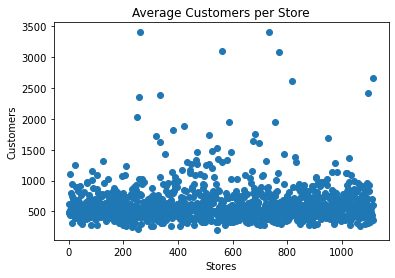

In [37]:
mean_cs = sales.pivot_table(index='store', values='customers', aggfunc='mean')
plt.scatter(mean_cs.index, mean_cs['customers']);
plt.xlabel('Stores')
plt.ylabel('Customers')
plt.title('Average Customers per Store');

In [40]:
# Qual loja passou mais dias com produtos em promoção?
promo =sales.groupby("store")[["promo"]].sum().sort_values("promo",ascending=False).head(15)
promo

,promo
store,
1,360
726,360
708,360
709,360
713,360
714,360
715,360
717,360
718,360


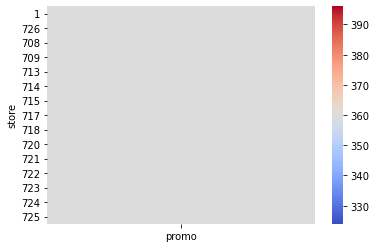

In [41]:
sns.heatmap(promo,cmap='coolwarm');
# 360 dias em promoção num período aproximado de 3 anos ou 1.095 dias, média de 120 dias ou 32% do ano em promoção.

In [57]:
# Qual foi o total de vendas por ano? 
sales['year'].value_counts()

2013    406974
2014    373855
2015    236380
Name: year, dtype: int64

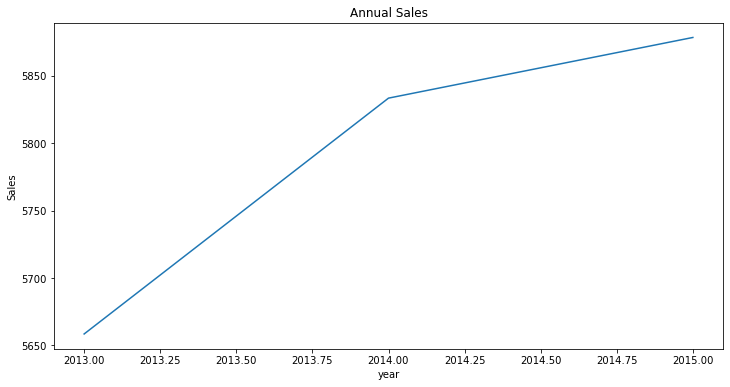

In [62]:
#As vendas aumentaram ou diminuíram?

sales_year = sales.pivot_table(index='year', values='sales', aggfunc='mean') 

plt.figure(figsize=(12,6))

ax = sns.lineplot(x=sales_year.index, y=sales_year['sales'])

ax.set_title('Annual Sales')
ax.set_ylabel('Sales')
ax.set_label('');

In [20]:
# Qual loja passou mais dias com produtos em promoção num ano?
sales["year"]=sales["date"].apply(lambda x: x.year)
sales.groupby(["year", "store"])[["promo"]].sum().sort_values("promo",ascending=False).head(15)


promo
year store       
2014 558      140
     368      140
     380      140
     379      140
     378      140
     377      140
     376      140
     375      140
     374      140
     373      140
     372      140
     371      140
     370      140
     369      140
     367      140

In [74]:
# Qual dia da semana é mais provável de ocorrer uma promoção?
a = sales.loc[sales['promo']==1, 'day_of_week'].value_counts() # dias 6 e 7 não tem promoção
a

1    77760
2    77580
3    77580
4    77580
5    77580
Name: day_of_week, dtype: int64

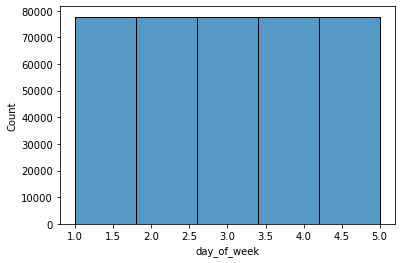

In [73]:
sns.histplot(data=sales.loc[sales['promo']==1], x='day_of_week', bins=5);

In [22]:
# Em qual feriado as vendas são maiores, natal ou páscoa?
mask=sales["state_holiday"].isin(["easter_holiday", "christmas"])
sales.loc[mask].groupby(['state_holiday', 'year'])[['sales']].sum().sort_values("sales", ascending=False).head(5)

sales
state_holiday  year        
easter_holiday 2015  515394
               2014  463353
               2013  454997
christmas      2014  360624
               2013  331182

In [94]:
ax_bar = sales.pivot_table(index=sales['state_holiday']), values='sales', aggfunc='sum').plot(kind='barh', figsize=(10,5));

ax_bar.set_ylabel('State Holiday', fontsize=15)
ax_bar.set_xlabel('Sales', fontsize=15)
plt.title('Sales on State Holidays', fontsize=15)

plt.show()

TypeError: 'DataFrame' objects are mutable, thus they cannot be hashed

In [23]:
# Qual loja conseguiu mais vendas num único mês?
sales["month"]=sales["date"].apply(lambda x: x.month)
sales.groupby(['year', 'month','store'])[['sales']].max().sort_values('sales',ascending=False).head(1)

,,,sales
year,month,store,
2015,6,909,41551


In [24]:
# Qual a loja com o máximo de clientes num determinado dia da semana e ano?
sales.groupby(['store', 'year','day_of_week'])[['customers']].max().sort_values("customers", ascending=False).head(5)

customers
store year day_of_week           
817   2013 2                 7388
262   2014 5                 5494
      2015 5                 5458
      2014 1                 5387
           4                 5297

In [25]:
# Qual o número máximo, mínimo, e mediana de clientes que o grupo atendeu num dia?
sales['day']=sales['date'].apply(lambda x: x.day)
sales.groupby(['year','month','day'])[['customers']].agg('sum').sort_values("customers", ascending=False).head(15)
#sales.groupby(['year','month','day'])[['customers']].agg('').sort_values("customers", ascending=True).head()

customers
year month day           
2013 12    23     1518600
           16     1340280
           20     1219287
           2      1199202
           17     1198877
2014 6     30     1189439
2013 3     28     1177111
     12    18     1158335
           19     1154752
2014 5     2      1141048
     12    23     1130310
           22     1130014
     3     31     1125153
2015 4     2      1119146
2013 12    30     1117442

In [26]:
sales.groupby(['year','month','day'])[['customers']].agg('sum').sort_values("customers", ascending=True).head(15)

customers
year month day           
2013 1     1        19491
2014 1     1        21925
2015 1     1        23049
2013 12    25       24022
2014 12    25       24451
2013 1     6        26387
           13       27044
           27       27286
           20       28040
     3     10       29963
     2     24       30107
           3        30349
2014 1     26       30422
2013 12    26       30762
     3     31       30772

In [27]:
sales.groupby(['year','month','day'])[['customers']].agg('sum').median()

customers    761154.0
dtype: float64

In [28]:
# Tem mais vendas/clientes com promoção ou sem promoção?
sales.groupby("promo")["sales", "customers"].mean().rename(mapper={0:"sem promo", 1:"com promo"})

<ipython-input-28-62207579afd2>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales.groupby("promo")["sales", "customers"].mean().rename(mapper={0:"sem promo", 1:"com promo"})


,sales,customers
promo,,
sem promo,4406.050805,517.823542
com promo,7991.152046,820.098815


In [29]:
# Tem mais vendas com promoção ou sem promoção?
sales.groupby("promo")["sales"].describe()

,count,mean,std,min,25%,50%,75%,max
promo,,,,,,,,
0,629129.0,4406.050805,3442.450020,0.0,0.0,4622.0,6367.0,41551.0
1,388080.0,7991.152046,3419.025495,0.0,5922.0,7553.0,9603.0,38722.0


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=43c508c6-91f9-4c07-8f9a-b0e96ce9285e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>